# 🔍 Introduction to Unsupervised Learning
This notebook covers **K-Means Clustering**, an essential unsupervised learning technique.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



## 📂 Load Dataset

In [3]:
df = pd.read_csv('unsupervised_data-2.csv')
df.head()

,Feature_1,Feature_2,True_Label
0,5.745071,4.792604,0
1,5.971533,7.284545,0
2,4.648770,4.648795,0
3,7.368819,6.151152,0
4,4.295788,5.813840,0


## 🔹 Standardize Features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Feature_1', 'Feature_2']])

## 🔹 Apply K-Means Clustering

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,Feature_1,Feature_2,True_Label,Cluster
0,5.745071,4.792604,0,0
1,5.971533,7.284545,0,0
2,4.648770,4.648795,0,0
3,7.368819,6.151152,0,0
4,4.295788,5.813840,0,0


## 📈 Visualizing Clusters

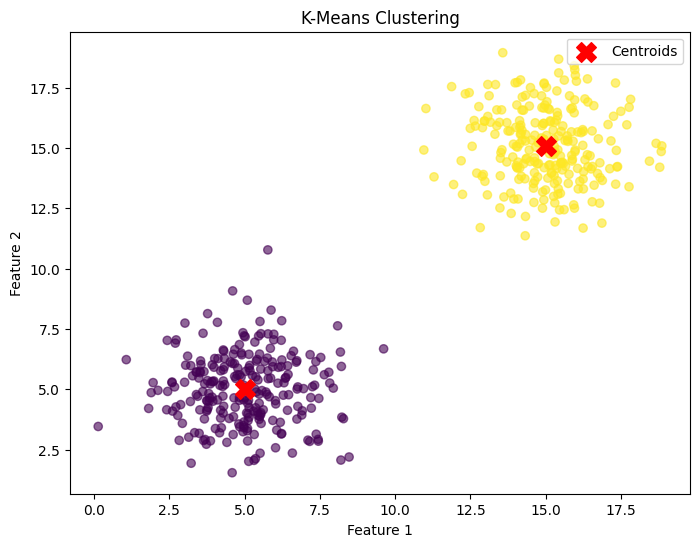

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

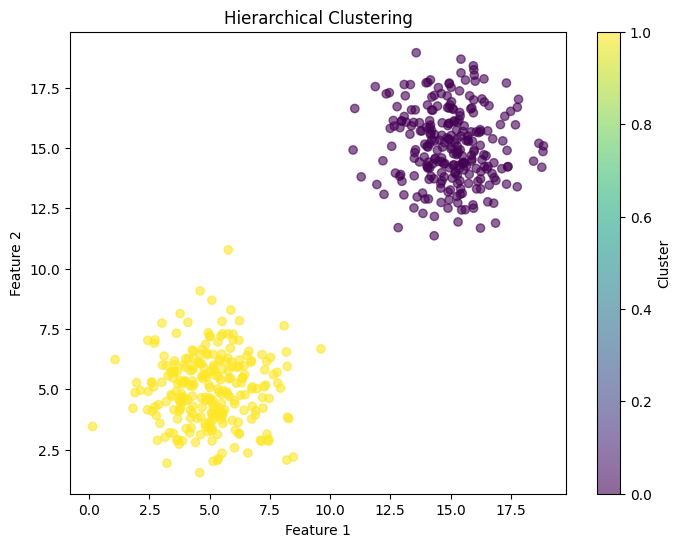

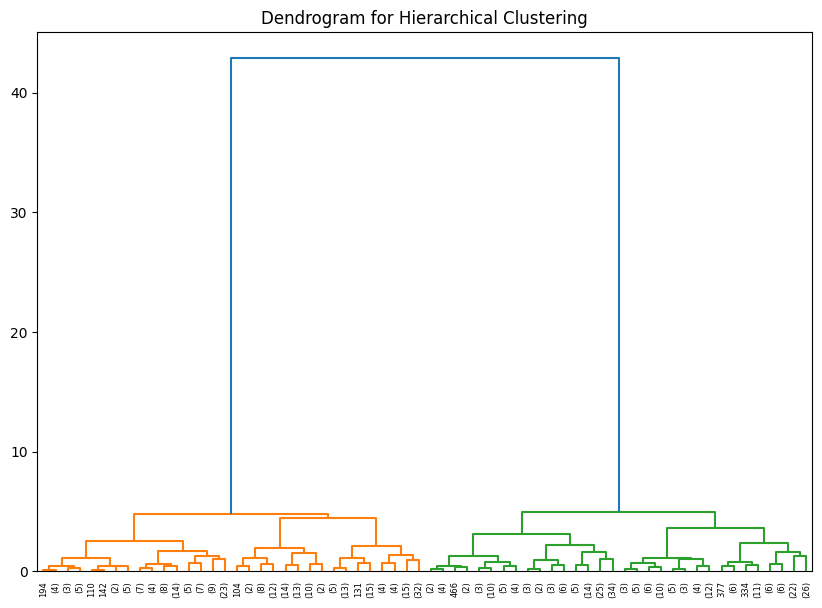

In [13]:
# Assuming df is already defined and contains relevant numerical features
X = df[['Feature_1', 'Feature_2']].values  # Selecting features for clustering
X = StandardScaler().fit_transform(X)  # Standardizing

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Agglo_Cluster'] = agg_clustering.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Agglo_Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering")
plt.colorbar(label="Cluster")
plt.show()

# Generate Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode="level", p=5)  # Show top 5 levels
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()